In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [5]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
# Convert 'TotalCharges' to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [15]:
# Fill missing values with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [16]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [17]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform

In [18]:
# Split the data into training and testing sets
X = df.drop('Churn', axis=1)
y = df['Churn']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training

In [21]:
# Logistic Regression
LGR = LogisticRegression()
LGR.fit(X_train, y_train)
y_pred_LGR = LGR.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# Decision Tree
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_pred_DTC = DTC.predict(X_test)

In [23]:
# Random Forest
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_pred_RFC = RFC.predict(X_test)

Evaluation

In [24]:
print("1. Logistic Regression:\n", classification_report(y_test, y_pred_LGR))
print("2. Decision Tree:\n", classification_report(y_test, y_pred_DTC))
print("3. Random Forest:\n", classification_report(y_test, y_pred_RFC))

1. Logistic Regression:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.66      0.57      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409

2. Decision Tree:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1036
           1       0.46      0.49      0.48       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409

3. Random Forest:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted av

In [25]:
# ROC-AUC Score
LGR_roc_auc = roc_auc_score(y_test, LGR.predict(X_test))
DTC_roc_auc = roc_auc_score(y_test, DTC.predict(X_test))
RFC_roc_auc = roc_auc_score(y_test, RFC.predict(X_test))

In [26]:
print("Logistic Regression AUC: ", LGR_roc_auc)
print("Decision Tree AUC: ", DTC_roc_auc)
print("Random Forest AUC: ", RFC_roc_auc)

Logistic Regression AUC:  0.7342570931713023
Decision Tree AUC:  0.6443321912490813
Random Forest AUC:  0.6970457627294089


In [27]:
# ROC Curve
LGR_fpr, LGR_tpr, _ = roc_curve(y_test, LGR.predict_proba(X_test)[:,1])
DTC_fpr, DTC_tpr, _ = roc_curve(y_test, DTC.predict_proba(X_test)[:,1])
RFC_fpr, RFC_tpr, _ = roc_curve(y_test, RFC.predict_proba(X_test)[:,1])

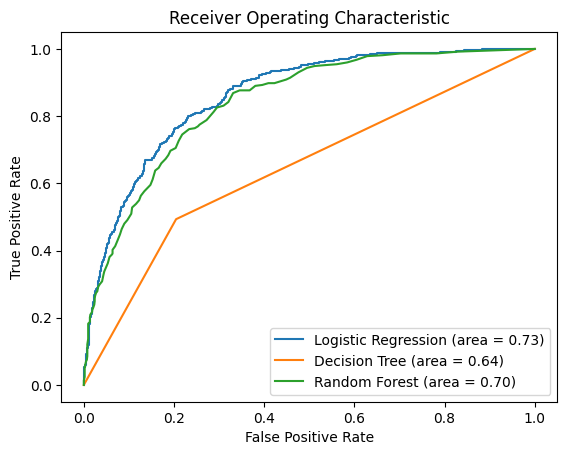

In [28]:
plt.figure()
plt.plot(LGR_fpr, LGR_tpr, label='Logistic Regression (area = %0.2f)' % LGR_roc_auc)
plt.plot(DTC_fpr, DTC_tpr, label='Decision Tree (area = %0.2f)' % DTC_roc_auc)
plt.plot(RFC_fpr, RFC_tpr, label='Random Forest (area = %0.2f)' % RFC_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()